# Pandas Test - Real life Exercise

In [71]:
import pandas as pd

For visualizations:

In [72]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [73]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
109087,2021-week_40,AD088KC6Y6,Puentes Company,IN,yes,NaN,Yield,UserPopY
227470,2021-week_48,AD08XQZX9K,Fancy,US,yes,NaN,Qality,DNNQ
139413,2021-week_42,AD089M8MDS,RelayFoods,JP,no,False,Qality,UserPopQ
364159,2022-week_52,AD08QVJ8HR,RelayFoods,IN,yes,NaN,Qality,UserPopQ
288733,2022-week_02,AD09LCZL98,Search Million Culture,GB,yes,NaN,Qality,DNNQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

## Answars

### Data Modifications

##### Q1

In [74]:
ad_recs_annotated['year'] = ad_recs_annotated.week_id.apply(lambda w: w.split('-')[0])
ad_recs_annotated.year

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
373783    2022
373784    2022
373785    2022
373786    2022
373787    2022
Name: year, Length: 373788, dtype: object

##### Q2

In [75]:
ad_recs_annotated['quarter'] = ad_recs_annotated.week_id.apply(lambda w: int(w.split('_')[1]) // 13 + 1)
ad_recs_annotated.quarter

0         3
1         3
2         3
3         3
4         3
         ..
373783    5
373784    5
373785    5
373786    5
373787    5
Name: quarter, Length: 373788, dtype: int64

#### Q3

In [76]:
ad_recs_annotated['is_success_int'] = ad_recs_annotated.is_success.map({'yes': 1, 'no': 0})
ad_recs_annotated.is_success_int

0         1
1         1
2         1
3         1
4         1
         ..
373783    1
373784    1
373785    1
373786    1
373787    1
Name: is_success_int, Length: 373788, dtype: int64

#### Q4

In [77]:
ad_recs_annotated.is_sever.isnull().sum()
ad_recs_annotated[ad_recs_annotated.is_sever.notnull()].is_success.value_counts()
ad_recs_annotated['is_sever_fixed'] = ad_recs_annotated.is_sever.fillna(False)
ad_recs_annotated['is_sever_fixed'].isnull().sum()
ad_recs_annotated.is_sever_fixed.value_counts(dropna=False)

False    329099
True      44689
Name: is_sever_fixed, dtype: int64

#### Q5

In [78]:
ad_recs_annotated['is_success'] = ad_recs_annotated.is_success.apply(lambda successStatus: successStatus.capitalize())
ad_recs_annotated.is_success

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
373783    Yes
373784    Yes
373785    Yes
373786    Yes
373787    Yes
Name: is_success, Length: 373788, dtype: object

# Subset selection

#### Q1

In [79]:
ad_recs_annotated[ad_recs_annotated['region'] == 'US'].shape[0]

103846

In [80]:
ad_recs_annotated.query('region == "US"').shape[0]

103846

#### Q2

In [81]:
ad_recs_annotated[(ad_recs_annotated['region'] == 'US') &
                  (ad_recs_annotated['is_success'] == 'Yes')].shape[0]

88918

In [82]:
ad_recs_annotated.query("region == 'US' and is_success == 'Yes'").shape[0]

88918

#### Q3

In [83]:
ad_recs_annotated["week_number"] = ad_recs_annotated.week_id.apply(lambda week:int(week.split('_')[1]))
ad_recs_annotated[(ad_recs_annotated['region'] == 'US') &
                  (ad_recs_annotated['is_success'] == 'Yes') &
                  (ad_recs_annotated['week_number'] == 52)].shape[0]

3342

In [84]:
ad_recs_annotated.query("region == 'US' and is_success == 'Yes' and week_number == 52 ").shape[0]

3342

#### Q4

In [85]:
rec_providers = ['DNNQ','RNNY','UserPopQ']
ad_recs_annotated[ad_recs_annotated['rec_provider'].isin(rec_providers)].shape[0]

200093

In [86]:
ad_recs_annotated.query('rec_provider in @rec_providers').shape[0]

200093

#### Q5

In [87]:
rec_providers_by_rule = ['RuleBased','RuleBasedY']
ad_recs_annotated[ad_recs_annotated['rec_provider'].isin(rec_providers_by_rule)].shape[0]

28336

In [88]:
ad_recs_annotated.query('rec_provider in @rec_providers_by_rule').shape[0]

28336

#### Q6

In [89]:
ad_recs_annotated[ad_recs_annotated['year'] == '2021'].shape[0]

271615

In [90]:
ad_recs_annotated.query("year == '2021'").shape[0]
ad_recs_annotated.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed,week_number
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33


#### Q7

In [91]:
ad_recs_annotated[(ad_recs_annotated['week_number'] >= 30) & 
                  (ad_recs_annotated['week_number'] <= 40)].shape[0]

115051

In [92]:
ad_recs_annotated.query("week_number >= 30 and week_number <= 40").shape[0]

115051

#### Q8

In [93]:
most_popular_ad = ad_recs_annotated.requester.value_counts().sort_values(ascending=False).index[0]
all_data_of_most_popular_ad = ad_recs_annotated[ad_recs_annotated["requester"] == most_popular_ad]

In [94]:
all_data_of_most_popular_ad = ad_recs_annotated.query("requester == @most_popular_ad")

#### Q9

In [95]:
least_popular_provider = ad_recs_annotated.rec_provider.value_counts().sort_values(ascending=True).index[0]
all_data_of_least_popular_provider = ad_recs_annotated[ad_recs_annotated['rec_provider'] == least_popular_provider]

In [96]:
all_data_of_least_popular_provider = ad_recs_annotated.query("rec_provider == @least_popular_provider")

#### Q10

In [97]:
all_data_which_is_server_None = ad_recs_annotated[ad_recs_annotated.is_sever.isnull()]
all_data_which_is_server_None.shape[0]

304195

In [98]:
all_data_which_is_server_None = ad_recs_annotated.query("is_sever != is_sever")
all_data_which_is_server_None.shape[0]

304195

#### Q11

In [99]:
def is_requester_3_words(requester):
    return len(requester.split(' ') ) == 3

In [100]:
three_words_requesters = ad_recs_annotated[ad_recs_annotated.requester.apply(is_requester_3_words)]
three_words_requesters.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed,week_number
72986,2021-week_38,AD08D87G09,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,38
275047,2022-week_01,AD087CZ88R,Search Million Culture,GB,Yes,NaN,Qality,DNNQ,2022,1,1,False,1
356265,2022-week_06,AD0988Y9WK,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,1,1,False,6
260110,2021-week_51,AD07ZCMV88,Search Million Culture,DE,Yes,NaN,Qality,UserPopQ,2021,4,1,False,51
124336,2021-week_41,AD098JT88D,Search Million Culture,JP,Yes,NaN,Qality,DNNQ,2021,4,1,False,41


In [101]:
three_words_requesters = ad_recs_annotated.requester.apply(is_requester_3_words)
ad_recs_annotated.query('@three_words_requesters == True').sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed,week_number
173154,2021-week_45,AD00OTVRXH,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,4,1,False,45
331142,2022-week_05,AD00FO8NYK,Search Million Culture,DE,No,False,Qality,DNNQ,2022,1,0,False,5
101545,2021-week_40,AD08PZFN8F,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,4,1,False,40
117274,2021-week_41,AD098X86DT,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,4,1,False,41
9991,2021-week_33,AD08M9ECRE,Search Million Culture,JP,Yes,NaN,Qality,ManualQ,2021,3,1,False,33


#### Q12

In [102]:
def is_ad_id_contain_six(ad_id):
    return '6' in ad_id

In [103]:
three_words_requesters_and_six_letter = ad_recs_annotated[
                            (ad_recs_annotated.requester.apply(is_requester_3_words)) &
                            (ad_recs_annotated.ad_id.apply(is_ad_id_contain_six))]
three_words_requesters_and_six_letter.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed,week_number
17276,2021-week_34,AD09668MF8,MoJoe Brewing Company,GB,Yes,NaN,Yield,DNNY,2021,3,1,False,34
208394,2021-week_47,AD096WD8NC,Search Million Culture,IN,Yes,NaN,Qality,UserPopQ,2021,4,1,False,47
245069,2021-week_50,AD000J679S,Search Million Culture,DE,No,False,Qality,UserPopQ,2021,4,0,False,50
203321,2021-week_47,AD0886JSZ8,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,4,1,False,47
111008,2021-week_40,AD08KT8T6S,Search Million Culture,JP,Yes,NaN,Qality,ManualQ,2021,4,1,False,40


In [104]:
three_words_requesters_and_six_letter =  ad_recs_annotated.requester.apply(is_requester_3_words) & ad_recs_annotated.ad_id.apply(is_ad_id_contain_six)
ad_recs_annotated.query('@three_words_requesters_and_six_letter == True').sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed,week_number
23371,2021-week_34,AD07VG66XX,Search Million Culture,JP,Yes,NaN,Qality,ManualQ,2021,3,1,False,34
287751,2022-week_02,AD078QGD6V,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2022,1,1,False,2
306582,2022-week_03,AD098ZJV6Z,Search Million Culture,IN,Yes,NaN,Qality,UserPopQ,2022,1,1,False,3
262781,2021-week_51,AD0988PG6G,Search Million Culture,GB,No,True,Qality,XGBQ,2021,4,0,True,51
273684,2022-week_01,AD07XDWQ68,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2022,1,1,False,1


#### Q13

In [105]:
import re  # regex library for extart numbers from ad_id
from functools import reduce

def is_ad_id_numbers_multiplication_bigger_than_30(ad_id):
    nums_as_string = re.findall(r'\d+', ad_id)
    return reduce(lambda num1,num2:num1*num2,list(map(lambda num_in_ad_id:int(num_in_ad_id),nums_as_string))) > 30

In [106]:
three_words_requesters_and_ad_id_bigger_than_30 = ad_recs_annotated[
                            (ad_recs_annotated.requester.apply(is_requester_3_words)) &
                            (ad_recs_annotated.ad_id.apply(is_ad_id_numbers_multiplication_bigger_than_30))]
three_words_requesters_and_ad_id_bigger_than_30.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed,week_number
334418,2022-week_05,AD08YY7SFW,Search Million Culture,GB,Yes,NaN,Qality,XGBQ,2022,1,1,False,5
42373,2021-week_35,AD07RHCHN8,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,3,1,False,35
195071,2021-week_46,AD088S8888,MoJoe Brewing Company,IN,Yes,NaN,Yield,RuleBasedY,2021,4,1,False,46
132349,2021-week_42,AD0888RHHZ,Search Million Culture,GB,No,True,Qality,DNNQ,2021,4,0,True,42
47935,2021-week_36,AD08DKMPX9,Search Million Culture,GB,No,True,Qality,XGBQ,2021,3,0,True,36


In [107]:
three_words_requesters_and_ad_id_bigger_than_30 = (ad_recs_annotated.requester.apply(is_requester_3_words)) &(ad_recs_annotated.ad_id.apply(is_ad_id_numbers_multiplication_bigger_than_30))
ad_recs_annotated.query('@three_words_requesters_and_ad_id_bigger_than_30 == True').sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed,week_number
90900,2021-week_39,AD07VPJV88,MoJoe Brewing Company,GB,Yes,NaN,Yield,DNNY,2021,4,1,False,39
67258,2021-week_37,AD08T6Y7YP,Search Million Culture,JP,Yes,NaN,Qality,DNNQ,2021,3,1,False,37
23653,2021-week_34,AD08PT9PNX,Search Million Culture,JP,No,False,Qality,UserPopQ,2021,3,0,False,34
19079,2021-week_34,AD0088KKXP,Search Million Culture,GB,Yes,NaN,Qality,DNNQ,2021,3,1,False,34
41386,2021-week_35,AD08J8DLGU,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,3,1,False,35


# Analysis

#### Q1

In [108]:
ad_recs_annotated.week_id.value_counts().sort_index()

2021-week_33    14356
2021-week_34    14371
2021-week_35    14373
2021-week_36    14390
2021-week_37    14392
2021-week_38    14347
2021-week_39    14416
2021-week_40    14406
2021-week_41    14380
2021-week_42    14376
2021-week_43    14367
2021-week_44    14299
2021-week_45    14440
2021-week_46    14350
2021-week_47    14402
2021-week_48    14404
2021-week_49    14337
2021-week_50    14404
2021-week_51    12805
2022-week_01    14385
2022-week_02    14423
2022-week_03    14317
2022-week_04    14367
2022-week_05    14362
2022-week_06    14389
2022-week_52    15930
Name: week_id, dtype: int64

#### Q2

In [109]:
ad_recs_annotated.groupby('region').week_number.unique()

region
DE    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
GB    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
IN    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
JP    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
US    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
Name: week_number, dtype: object

In [110]:
def find_missing_week_id(week_ids):
    missing_weeks = []
    for i in range (33, 53):
        if i not in week_ids:
            missing_weeks.append(i)
    return missing_weeks

In [111]:
ad_recs_annotated.groupby('region').week_number.unique().apply(find_missing_week_id)

region
DE      []
GB      []
IN      []
JP    [51]
US      []
Name: week_number, dtype: object

#### Q3

In [112]:
ad_recs_annotated.groupby(['week_id', 'region']).is_success_int.sum().unstack('region')

region,DE,GB,IN,JP,US
week_id,,,,,
2021-week_33,1930.0,2702.0,2341.0,1113.0,3528.0
2021-week_34,1883.0,2681.0,2424.0,1117.0,3511.0
2021-week_35,1931.0,2744.0,2426.0,1127.0,3501.0
2021-week_36,1909.0,2689.0,2458.0,1122.0,3537.0
2021-week_37,1938.0,2711.0,2438.0,1154.0,3463.0
2021-week_38,1934.0,2671.0,2450.0,1096.0,3402.0
2021-week_39,1994.0,2571.0,2456.0,1133.0,3483.0
2021-week_40,1917.0,2602.0,2452.0,1154.0,3492.0
2021-week_41,1954.0,2661.0,2456.0,1196.0,3471.0


#### Q4

In [113]:
ad_recs_annotated.is_sever.value_counts(dropna=False)[0]

304195

#### Q5

In [114]:
given_week = '2021-week_33'
data_of_given_week = ad_recs_annotated.query("@given_week == week_id")
ad_sent_in_give_week = data_of_given_week.groupby(['ad_id']).is_success_int.sum()
for adIndex in range(0,len(ad_sent_in_give_week)):
    if(ad_sent_in_give_week[adIndex] > 1):
        print(f'ad_id {ad_sent_in_give_week.index[adIndex]} sent {ad_sent_in_give_week[adIndex]} times in {given_week} week')

ad_id AD0008VKDD sent 2 times in 2021-week_33 week
ad_id AD0009X89W sent 2 times in 2021-week_33 week
ad_id AD000APK8G sent 3 times in 2021-week_33 week
ad_id AD000ELSM8 sent 2 times in 2021-week_33 week
ad_id AD000FPK09 sent 2 times in 2021-week_33 week
ad_id AD000IU80H sent 2 times in 2021-week_33 week
ad_id AD000KU988 sent 2 times in 2021-week_33 week
ad_id AD000UCH08 sent 3 times in 2021-week_33 week
ad_id AD000VOCQP sent 2 times in 2021-week_33 week
ad_id AD00688888 sent 4 times in 2021-week_33 week
ad_id AD0068KNMU sent 2 times in 2021-week_33 week
ad_id AD006CSPZK sent 2 times in 2021-week_33 week
ad_id AD006M7NSS sent 2 times in 2021-week_33 week
ad_id AD006VAZYN sent 2 times in 2021-week_33 week
ad_id AD0078F8D7 sent 2 times in 2021-week_33 week
ad_id AD007CRC8P sent 2 times in 2021-week_33 week
ad_id AD007FD68Y sent 2 times in 2021-week_33 week
ad_id AD007TGDXM sent 2 times in 2021-week_33 week
ad_id AD00808FIC sent 2 times in 2021-week_33 week
ad_id AD0080D8Q8 sent 2 times i

#### Q6 

##### a

In [115]:
only_ad_that_sended = ad_recs_annotated.query("is_success_int == 1") 
mapping_ad_to_weeks = only_ad_that_sended.groupby(['ad_id']).week_id.unique()
ad_sent_at_diffrent_weeks = mapping_ad_to_weeks.apply(lambda weekId: len(weekId)).sort_values(ascending=False)
ad_id = ad_sent_at_diffrent_weeks.index[0]
weeks_amount = ad_sent_at_diffrent_weeks[0]
print(f'ad_id {ad_id} sent in {weeks_amount} diffrent weeks')

ad_id AD079VP6DH sent in 26 diffrent weeks


##### b

In [116]:
mapping_ad_to_weeks[ad_id]

array(['2021-week_33', '2021-week_34', '2021-week_35', '2021-week_36',
       '2021-week_37', '2021-week_38', '2021-week_39', '2021-week_40',
       '2021-week_41', '2021-week_42', '2021-week_43', '2021-week_44',
       '2021-week_45', '2021-week_46', '2021-week_47', '2021-week_48',
       '2021-week_49', '2021-week_50', '2021-week_51', '2022-week_01',
       '2022-week_02', '2022-week_03', '2022-week_04', '2022-week_05',
       '2022-week_06', '2022-week_52'], dtype=object)

#### Q7

In [117]:
all_data_which_is_server_None = ad_recs_annotated.query("is_sever != is_sever")
all_data_which_is_server_None.query("is_success_int == 1").shape[0] # succefull amount

304189

In [118]:
all_data_which_is_server_None.query("is_success_int == 0").shape[0] # non succefull amount

6

#### Q8

In [119]:
def get_yeild_per_quality(recommendation_types):
    quilityNum = recommendation_types.value_counts()[1]
    yieldNum = recommendation_types.value_counts()[0]
    return yieldNum if quilityNum == 0 else yieldNum / quilityNum

In [120]:
ad_recs_annotated.groupby(['region','week_number']).recommendation_type.apply(get_yeild_per_quality).unstack('region')

region,DE,GB,IN,JP,US
week_number,,,,,
1,5.388298,5.552361,1.388597,8.809816,2.922701
2,5.523161,5.583505,1.314801,9.024845,2.631103
3,3.784708,3.892142,1.204124,9.115385,1.953972
4,6.232416,7.331579,1.433383,11.015152,1.748454
5,4.631206,5.373494,1.391337,10.896296,1.865950
6,5.830508,9.691275,1.350774,10.288732,1.717495
33,3.917864,5.360000,1.183060,4.613240,1.948071
34,5.129870,6.498824,1.001866,2.577181,1.111755
35,3.406998,5.043315,1.119551,2.264463,1.056818


#### Q9

In [121]:
len(ad_recs_annotated.requester.unique())

36

#### Q10

In [122]:
ad_recs_annotated.groupby(['region']).apply(lambda grp:grp.requester.value_counts().head(5))

region                        
DE      Search Million Culture    23657
        RelayFoods                17313
        MoJoe Brewing Company      8616
        iDreamsky Technology       3542
        SOLOMO365                  2435
GB      Search Million Culture    28002
        RelayFoods                15920
        Fancy                     13678
        MoJoe Brewing Company      9530
        iDreamsky Technology       3919
IN      Puentes Company           29427
        Search Million Culture    21365
        RelayFoods                17352
        MoJoe Brewing Company      7191
        iDreamsky Technology       1995
JP      RelayFoods                24574
        Search Million Culture     7906
        MoJoe Brewing Company      3549
        LocalVox Media             1724
        Tab Solutions              1366
US      Extreme DA                57215
        Fancy                     18668
        Tab Solutions              9790
        Search Million Culture     5610
        S

#### Q11

In [123]:
ad_recs_annotated.rec_provider.unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

#### Q12

In [124]:
ad_recs_annotated.groupby(['region']).rec_provider.unique().apply(lambda rec_provider:len(rec_provider) > 1)

region
DE    True
GB    True
IN    True
JP    True
US    True
Name: rec_provider, dtype: bool

#### Q13

In [125]:
ad_recs_annotated.groupby(['rec_provider']).rec_provider.unique().apply(lambda rec_provider:len(rec_provider) > 1)

rec_provider
BooksQ               False
BooksY               False
DNNQ                 False
DNNY                 False
ManualQ              False
ManualY              False
RNNQ                 False
RNNY                 False
RuleBased            False
RuleBasedY           False
UserPopQ             False
UserPopSelectionQ    False
UserPopSelectionY    False
UserPopY             False
XGBQ                 False
XGBY                 False
Name: rec_provider, dtype: bool

#### Q14

#### where the name of rec_provider include 'Q' so the Yield null and if the rec_provider in include 'Y'
#### so Qality in null and in the Manual both value not null

In [126]:
ad_recs_annotated.groupby(['rec_provider','recommendation_type']).recommendation_type.count().unstack('rec_provider')

rec_provider,BooksQ,BooksY,DNNQ,DNNY,ManualQ,ManualY,RNNQ,RNNY,RuleBased,RuleBasedY,UserPopQ,UserPopSelectionQ,UserPopSelectionY,UserPopY,XGBQ,XGBY
recommendation_type,,,,,,,,,,,,,,,,
Qality,1720.0,NaN,117424.0,NaN,10220.0,1439.0,20983.0,NaN,182.0,NaN,69937.0,2417.0,NaN,NaN,12250.0,NaN
Yield,NaN,4150.0,NaN,45116.0,3624.0,543.0,NaN,12732.0,NaN,28154.0,NaN,NaN,21.0,38600.0,NaN,4276.0


#### Q15

In [127]:
ad_recs_annotated.groupby(['region']).is_success_int.sum().sort_values(ascending=False).head(1)

region
US    88918
Name: is_success_int, dtype: int64

#### Q16

In [128]:
ad_recs_annotated.head(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed,week_number
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33


In [129]:
only_is_success = ad_recs_annotated.query("is_success_int == 1")
only_is_success.groupby(['region']).rec_provider.value_counts().sort_values(ascending=False).head(1)

region  rec_provider
GB      DNNQ            34681
Name: rec_provider, dtype: int64

In [130]:
import numpy as np
from scipy import stats

def calc_ci(mySeries,alpha = 0.05, n_sided = 2):
    z_alpha = stats.norm.ppf(1-alpha/n_sided) # 1.96 == 0.95% condifdance interval
    mu = mySeries.mean()
    sigma = mySeries.std()
    upper_bound = mu + z_alpha * sigma
    lower_bound = mu - z_alpha * sigma
    return upper_bound, lower_bound

#### Q21

In [131]:
ad_recs_annotated['is_sever_int'] = ad_recs_annotated.is_sever_fixed.apply(lambda is_sever: 1 if is_sever else 0)
dfGroupedOfRecTypeAndRegion = ad_recs_annotated.groupby(['recommendation_type', 'region'])

presentedTableWithSuccessRateAndServerDefectsRate = {
                  'success_rate': dfGroupedOfRecTypeAndRegion.is_success_int.mean(),
                  'sever_defects_rate': dfGroupedOfRecTypeAndRegion.is_sever_int.mean(),
                  'CI_per_metric_for_success_rate': dfGroupedOfRecTypeAndRegion.is_success_int.apply(calc_ci),
                  'CI_per_metric_for_sever_defects_rate': dfGroupedOfRecTypeAndRegion.is_sever_int.apply(calc_ci)
                 }

presentedTableAsDataFrame = pd.DataFrame(presentedTableWithSuccessRateAndServerDefectsRate)
presentedTableAsDataFrame

success_rate  sever_defects_rate  \
recommendation_type region                                     
Qality              DE          0.806681            0.121503   
                    GB          0.850367            0.108295   
                    IN          0.806129            0.088980   
                    JP          0.777806            0.156587   
                    US          0.899070            0.074470   
Yield               DE          0.845986            0.080121   
                    GB          0.772476            0.177675   
                    IN          0.719186            0.191504   
                    JP          0.683988            0.146639   
                    US          0.828812            0.102444   

                                        CI_per_metric_for_success_rate  \
recommendation_type region                                               
Qality              DE      (1.5806805607588263, 0.032680608343470086)   
                    GB        (1.549513654170867, 0.15121974352087542)   
                    IN       (1.5809688987456152, 0.03128998698825336)   
                    JP      (1.5926153916991286, -0.03700344887581808)   
                    US       (1.4894884519871736, 0.30865225276956443)   
Yield               DE       (1.5534890426340642, 0.13848200601094496)   
                    GB      (1.5941889827145101, -0.04923647553536281)   
                    IN       (1.599997976955333, -0.16162626876186703)   
                    JP      (1.5952839032445976, -0.22730728746025208)   
                    US       (1.5670836342288559, 0.09054043162360792)   

                                  CI_per_metric_for_sever_defects_rate  
recommendation_type region                                              
Qality              DE       (0.7618514199113504, -0.5188451568633337)  
                    GB       (0.7173634437332875, -0.5007733827849136)  
                    IN       (0.647016701967305, -0.46905723853834186)  
                    JP       (0.8688706575224375, -0.5556957724114956)  
                    US      (0.5890358325763637, -0.44009494041055597)  
Yield               DE        (0.6122360356600378, -0.451993652222906)  
                    GB        (0.926876290597832, -0.5715269054273733)  
                    IN       (0.9627288458625305, -0.5797209502547578)  
                    JP        (0.840022664753804, -0.5467456267544535)  
                    US       (0.6967718116316629, -0.4918834353499256)

In [132]:
def show_wow_graph(x,y):
    fig = px.scatter(x=x, y=y, labels={'x':'x', 'y':'y'}) # override keyword names with labels
    fig.show()    

#### Q24

In [133]:
dfGroupedWowRegionAndRecProv = ad_recs_annotated.groupby(['week_id', 'region', 'rec_provider'])

presentedTableWithSuccessRate = {
    'success_rate': dfGroupedWowRegionAndRecProv.is_success_int.mean(),
    'CI_per_metric_for_success_rate': dfGroupedWowRegionAndRecProv.is_success_int.apply(calc_ci)
}

presentedTableAsDataFrame = pd.DataFrame(presentedTableWithSuccessRate)
presentedTableAsDataFrame

success_rate  \
week_id      region rec_provider                 
2021-week_33 DE     BooksQ            0.838235   
                    BooksY            0.975000   
                    DNNQ              0.827804   
                    DNNY              0.906593   
                    ManualQ           0.865385   
...                                        ...   
2022-week_52 US     RuleBasedY        0.521951   
                    UserPopQ          0.759259   
                    UserPopY          0.650943   
                    XGBQ              0.763441   
                    XGBY              0.902256   

                                              CI_per_metric_for_success_rate  
week_id      region rec_provider                                              
2021-week_33 DE     BooksQ         (1.5653283613961515, 0.11114222683914265)  
                    BooksY          (1.2848975161522809, 0.6651024838477192)  
                    DNNQ           (1.5680821425124982, 0.08752607233742271)  
                    DNNY            (1.4785190143934748, 0.3346677987933385)  
                    ManualQ           (1.54087101310017, 0.1898982176690608)  
...                                                                      ...  
2022-week_52 US     RuleBasedY    (1.5021844719901392, -0.45828203296574876)  
                    UserPopQ      (1.6050771767133425, -0.08655865819482389)  
                    UserPopY       (1.5866755694198442, -0.2847887769670141)  
                    XGBQ           (1.600879928628856, -0.07399820819874836)  
                    XGBY           (1.4865041364786884, 0.31800714171680033)  

[1212 rows x 2 columns]

#### Q25

In [134]:
only_is_success.requester.value_counts().sort_values(ascending=False).head(1)

Search Million Culture    70331
Name: requester, dtype: int64

#### Q29

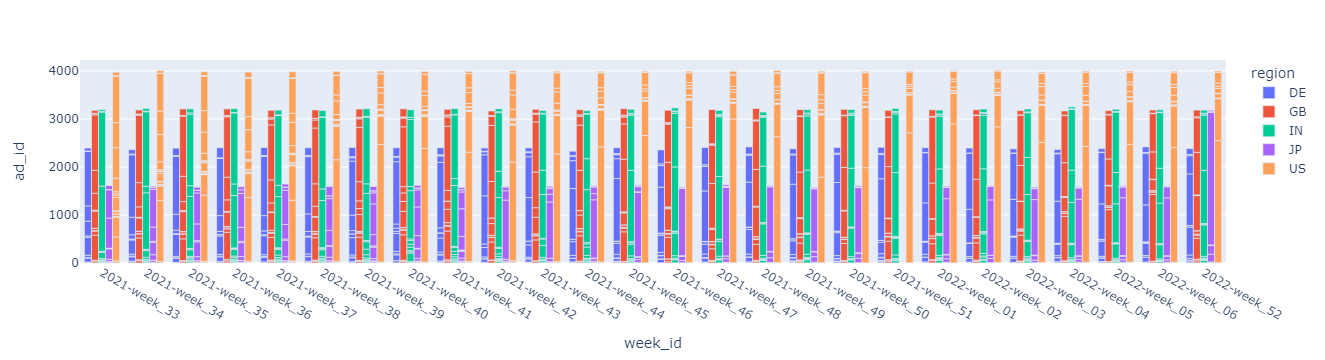

In [136]:
df = ad_recs_annotated.groupby(['region', 'week_id','requester']).ad_id.size().reset_index()
fig4 = px.bar(df, x = 'week_id', y = 'ad_id', color = 'region',barmode='group')
fig4.show()

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [137]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

Produce the following requestser proportion graph:

## Appendix

Code to create weekly files:

In [65]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)